# Model Performance on Data from Different Sources

In this notebook, we evaluated the cross dataset accuracy of the trained classifiers.

There are 15 different data sources.
For each data source, we trained a classifier using a training sample from the data source.
For evaluation, we use each classifier to predict the labels of 15 new samples from each data sources.
Finally, we organize the model accuracy on each sample sets into a 15x15 matrix.

In [6]:
import pandas as pd
import numpy as np
from io import StringIO
from os.path import expanduser

In [7]:
with open(expanduser("~/a2.txt")) as f:
    lines = [line.split(",") for line in f.readlines()]

In [14]:
regions = [line[0] for line in lines]
mat = [list(map(lambda t: float(t), line[1:])) for line in lines]
print(regions)

['AGSO', 'JAMSTEC', 'JAMSTEC2', 'NGA', 'NGA2', 'NGDC', 'NOAA', 'SIO', 'US-multi']


In [15]:
regions[1] = "JAM"
regions[2] = "JAM2"

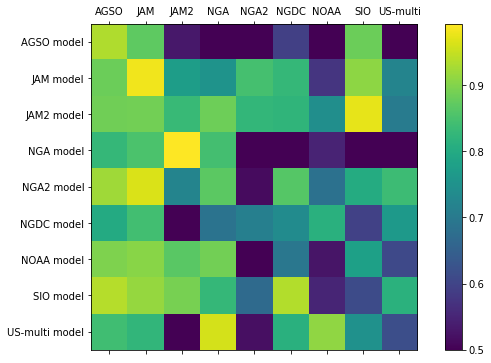

In [16]:
%matplotlib inline

from matplotlib import pyplot as plt

if True:
    THRESHOLD = 0.5
    mat = np.clip(mat, THRESHOLD, 1.0)

fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(mat)
fig.colorbar(cax);

ax.set_yticklabels([''] + [s + " model" for s in regions])
ax.set_xticklabels([''] + regions);